[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-510/blob/master/k-beauty-oversea-online-sale-output.ipynb)

## 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액
* 국가통계포털 : http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

### K-Beauty는 성장하고 있을까? 해외 직접판매를 한다면 어느 국가로 판매전략을 세우면 좋을까?
* K-Beauty란? [K-Beauty - Wikipedia](https://en.wikipedia.org/wiki/K-Beauty)
* e : 추정치, p : 잠정치, - : 자료없음, ... : 미상자료, x : 비밀보호, ▽ : 시계열 불연 ( 단위 : 백만원 )

## 필요 라이브러리 가져오기

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## 한글폰트 설정
* https://github.com/ychoi-kr/koreanize-matplotlib

In [66]:
# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서는 아래 모듈을 설치하고 불러와서 사용하세요. 

# !pip install koreanize-matplotlib

import koreanize_matplotlib

In [67]:
# os 별로 폰트를 다르게 설정해 줍니다.
    
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

## 데이터 로드하기

In [68]:
# %ls data

In [69]:
from glob import glob

# glob("data/*.csv")

In [70]:
# df_raw = pd.read_csv("data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_202002.csv", 
#                      encoding="cp949")
df_raw = pd.read_csv("C:/Users/LG/cmder/data/data/Kbeuty.csv", 
                     encoding="cp949")
df_raw.shape

(450, 29)

In [71]:
# "국가(대륙)별" 데이터 빈도수 세기
# 빈도수 나오면 value_counts를 이용 -> (normalize) 하면 비율로도 볼 수 있음
df_raw["국가(대륙)별"].value_counts()

합계            45
미국            45
중국            45
일본            45
아세안(ASEAN)    45
유럽연합(EU)      45
중동            45
중남미           45
대양주           45
기타            45
Name: 국가(대륙)별, dtype: int64

In [72]:
# 미국 데이터만 따로 보기
df_raw[df_raw["국가(대륙)별"]=="미국"].head()

,국가(대륙)별,상품군별,판매유형별,2014.1/4,2014.2/4,2014.3/4,2014.4/4,2015.1/4,2015.2/4,2015.3/4,...,2018.1/4,2018.2/4,2018.3/4,2018.4/4,2019.1/4,2019.2/4,2019.3/4,2019.4/4,2022.2/4,2022.3/4 p)
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,...,42679,40207,37631,48978,40985,44973,55512,54054,52364,40695
46,미국,합계,면세점,-,-,-,-,-,-,-,...,5184,3603,2317,2079,2657,2951,1818,1481,220,222
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,...,37495,36604,35314,46899,38328,42022,53694,52573,52144,40473
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,...,2033,1553,1784,1774,1298,1408,1653,1383,685,695
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,0,0,0,1,0,0,0,0,0,0


## 분석과 시각화를 위한 tidy data 만들기
* https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [73]:
df = df_raw.melt(id_vars=["국가(대륙)별","상품군별","판매유형별"],
                 var_name="기간",value_name="백만원")
df.shape

(11700, 5)

In [74]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014.1/4,148272
1,합계,합계,면세점,2014.1/4,-
2,합계,합계,면세점 이외,2014.1/4,-
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11700 entries, 0 to 11699
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  11700 non-null  object
 1   상품군별     11700 non-null  object
 2   판매유형별    11700 non-null  object
 3   기간       11700 non-null  object
 4   백만원      11700 non-null  object
dtypes: object(5)
memory usage: 457.2+ KB


## 데이터 전처리
### 기간에서 연도를 분리하기

In [76]:
df["기간"]

0           2014.1/4
1           2014.1/4
2           2014.1/4
3           2014.1/4
4           2014.1/4
            ...     
11695    2022.3/4 p)
11696    2022.3/4 p)
11697    2022.3/4 p)
11698    2022.3/4 p)
11699    2022.3/4 p)
Name: 기간, Length: 11700, dtype: object

In [77]:
# df["연도"]

df["연도"] = df["기간"].map(lambda x : int(x.split(".")[0]))

In [78]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도
0,합계,합계,계,2014.1/4,148272,2014
1,합계,합계,면세점,2014.1/4,-,2014
2,합계,합계,면세점 이외,2014.1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-,2014


In [79]:
# df["분기"]

df["분기"] = df["기간"].map(lambda x : int(x.split(".")[1].split("/")[0]))
df.tail()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
11695,기타,생활용품 및 자동차용품,면세점,2022.3/4 p),0,2022,3
11696,기타,생활용품 및 자동차용품,면세점 이외,2022.3/4 p),83,2022,3
11697,기타,기 타,계,2022.3/4 p),288,2022,3
11698,기타,기 타,면세점,2022.3/4 p),0,2022,3
11699,기타,기 타,면세점 이외,2022.3/4 p),288,2022,3


### 금액을 수치데이터로 표현하기 위해 데이터 타입 변경하기

In [80]:
# df["million"]
# 결측치를 nan으로 바꾼것은 float

df["백만원"] = df["백만원"].replace("-", np.nan).astype(float)
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014.1/4,148272.0,2014,1
1,합계,합계,면세점,2014.1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014.1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014,1


### 필요없는 데이터 제거하기

In [81]:
# 합계 데이터는 따로 구할 수 있기 때문에 전체 데이터에서 제거합니다.
# df["국가(대륙)별"] != "합계"
# df["상품군별"] != "합계"
# df["판매유형별"] != "계"

df = df[(df["국가(대륙)별"] != "합계") & (df["상품군별"] != "합계")].copy()
df.head()


,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014.1/4,2216.0,2014,1
49,미국,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014.1/4,NaN,2014,1
51,미국,가전·전자·통신기기,계,2014.1/4,2875.0,2014,1
52,미국,가전·전자·통신기기,면세점,2014.1/4,NaN,2014,1


In [82]:
# 결측치 개수를 파악하기 위해서는 isnull().sum()을 이용
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        3024
연도            0
분기            0
dtype: int64

## K-Beauty 시각화
### 전체 상품군 판매액

In [83]:
# 판매유형별 데이터는 일부 기간에는 "계"만 존재하기 때문에
# 판매유형별 == "계" 데이터만 가져와서 봐야지
# 평균 값을 구하는 그래프에서 올바른 값을 표현할 수 있습니다.

# plt.figure(figsize=(15, 4))
df_total = df[df["판매유형별"]=="계"].copy()
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014.1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014.1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014.1/4,47.0,2014,1
57,미국,서 적,계,2014.1/4,962.0,2014,1
60,미국,사무·문구,계,2014.1/4,25.0,2014,1


<AxesSubplot:xlabel='연도', ylabel='백만원'>

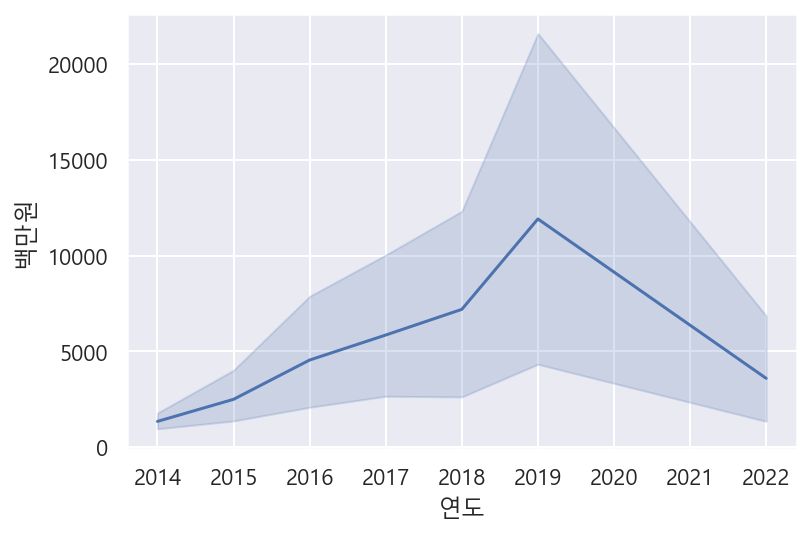

In [84]:
# 연도, 판매액  lineplot으로 그리기

# plt.figure(figsize=(15,4))

sns.set(font_scale=1, font="Malgun Gothic")
sns.lineplot(data=df_total, x="연도", y="백만원")

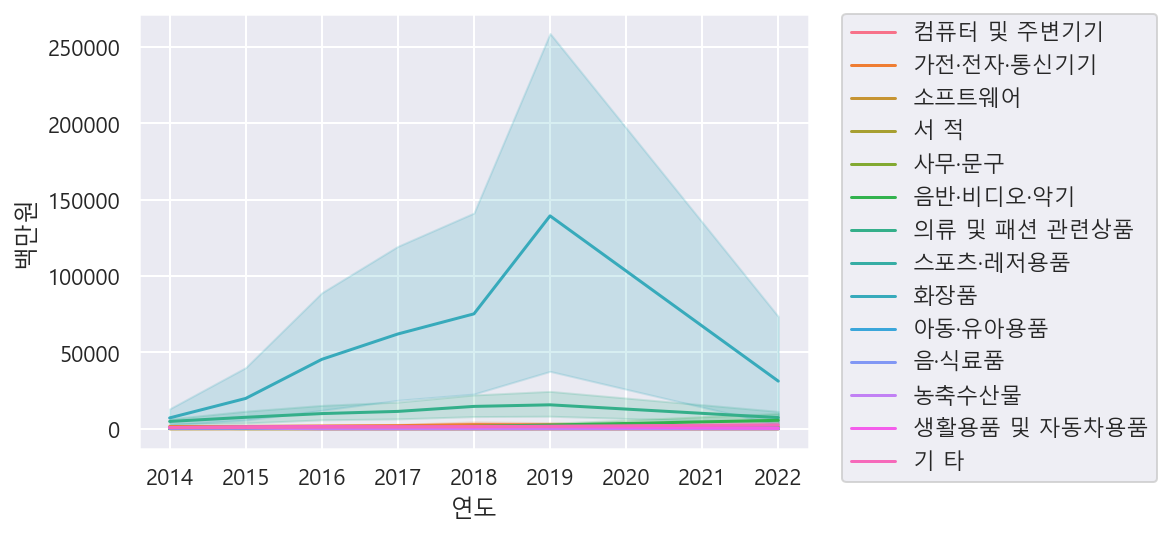

In [85]:
# 연도, 판매액 lineplot으로 그리고 상품군별로 다른 색상으로 표시하기
sns.lineplot(data=df_total, x="연도", y="백만원",hue="상품군별")
plt.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0)

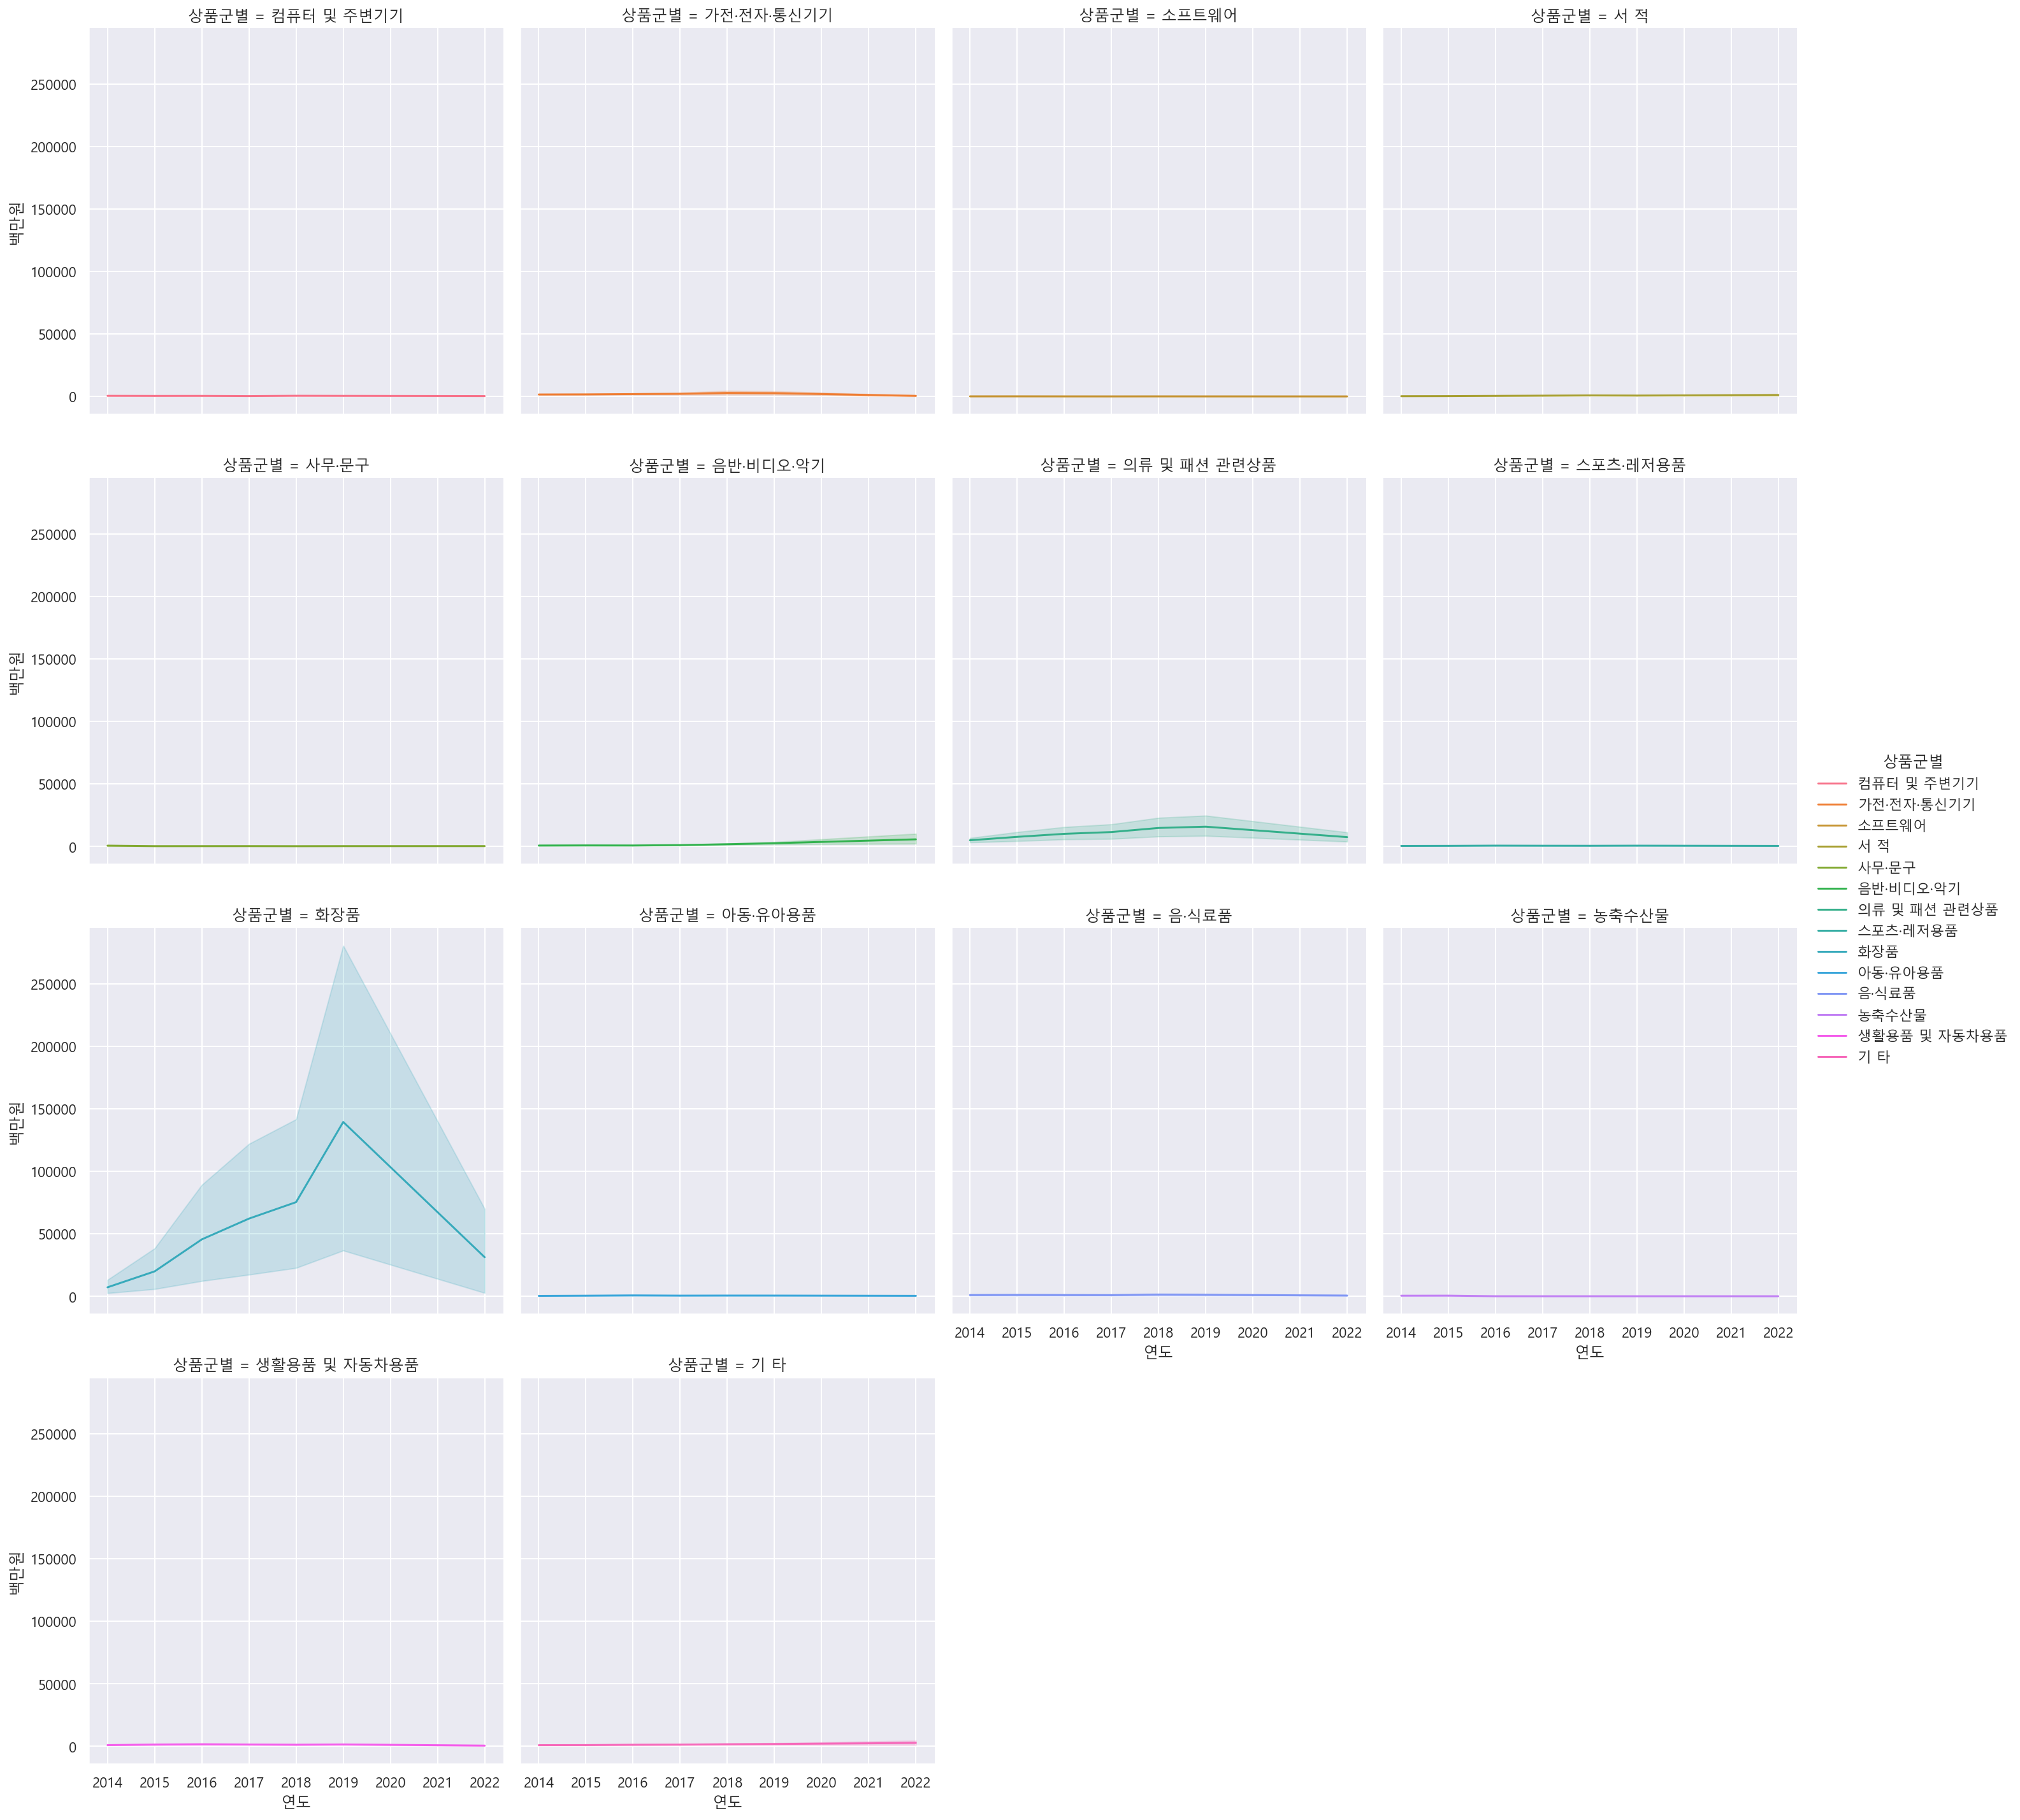

In [86]:
#위에 그린 그래프를 자세히 보기 위해 서브플롯으로 표시하기
# hue -> 특정 조건별로 색상을 다르게 할 때 사용


sns.relplot(data=df_total, x="연도", y="백만원",
            hue="상품군별", kind="line", col="상품군별", col_wrap=4)

In [87]:
# df_sub

df_sub = df_total[~df_total["상품군별"].isin(["화장품","의류 및 패션 관련상품"])].copy()
df_sub

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014.1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014.1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014.1/4,47.0,2014,1
57,미국,서 적,계,2014.1/4,962.0,2014,1
60,미국,사무·문구,계,2014.1/4,25.0,2014,1
...,...,...,...,...,...,...,...
11685,기타,아동·유아용품,계,2022.3/4 p),497.0,2022,3
11688,기타,음·식료품,계,2022.3/4 p),20.0,2022,3
11691,기타,농축수산물,계,2022.3/4 p),0.0,2022,3
11694,기타,생활용품 및 자동차용품,계,2022.3/4 p),83.0,2022,3


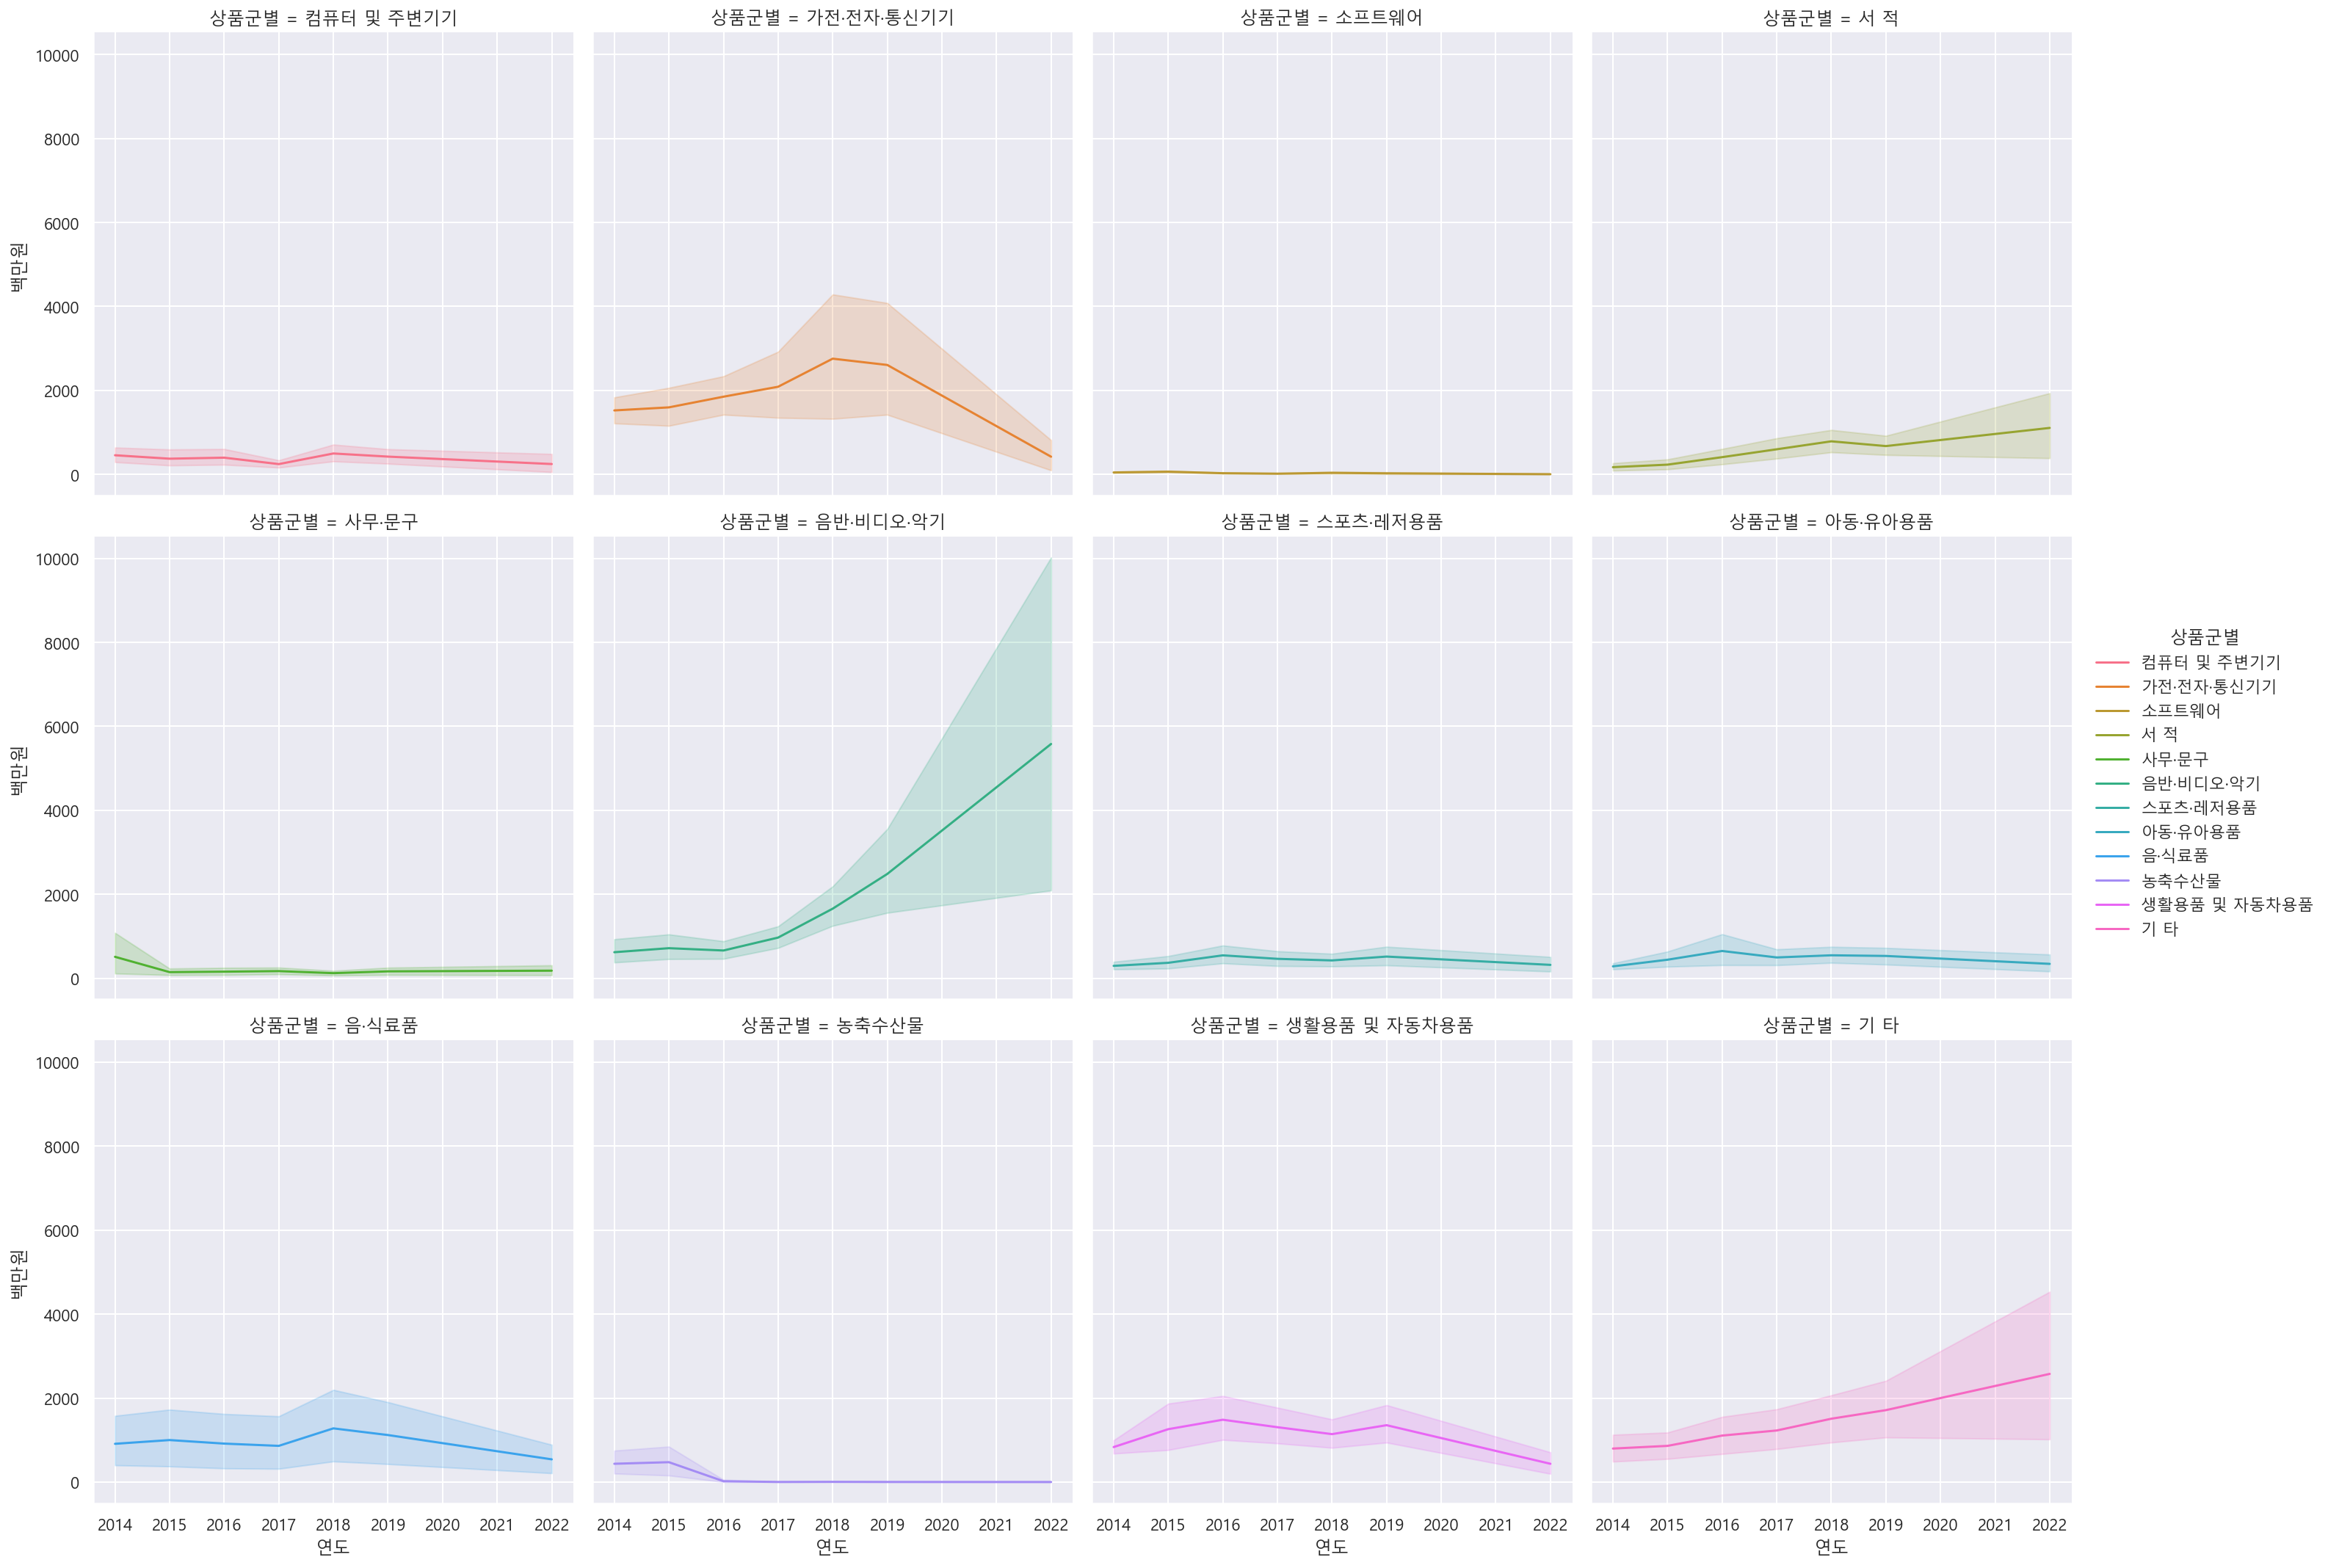

In [88]:
# sns.relplot

sns.relplot(data=df_sub, x="연도", y="백만원", hue="상품군별", col="상품군별", 
            col_wrap=4, kind="line")

### 화장품의 온라인쇼핑 해외직접판매액

In [89]:
# df_cosmetic 이라는 변수에 상품군별이 화장품인 데이터만 가져오기
# .copy() -> 명시적으로 복사를 해주지 않으면 이전 데이터에 문제가 생길 수 있음
# 새로운 칼럼을 추가하거나 할 때

df_cosmetic = df_total[df_total["상품군별"].isin(["화장품"])].copy()
df_cosmetic["상품군별"].unique()

array(['화장품'], dtype=object)

<AxesSubplot:xlabel='연도', ylabel='백만원'>

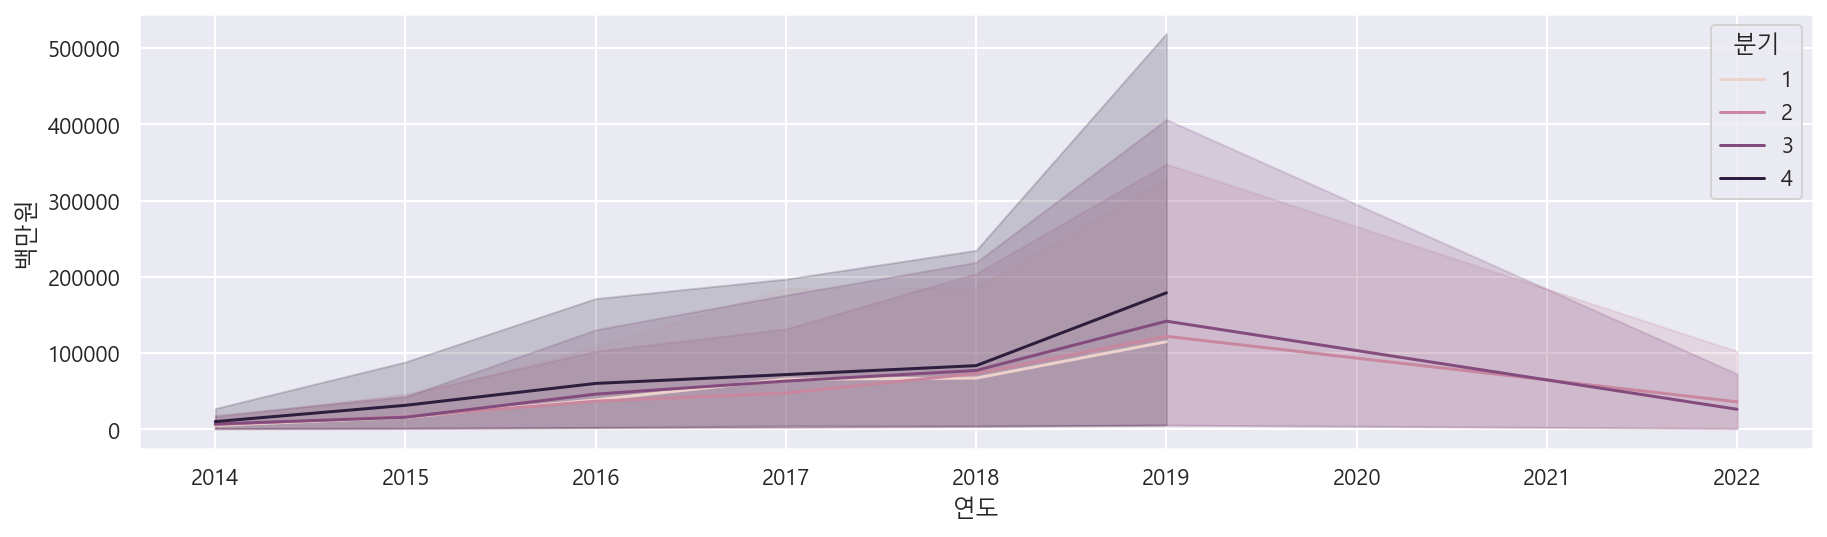

In [90]:
#연도와 판매액을 lineplot으로 그리고 분기별로 다른 색상으로 표현해 보기

plt.figure(figsize=(15,4))
sns.lineplot(data=df_cosmetic, x="연도", y="백만원", hue="분기")

<AxesSubplot:xlabel='기간', ylabel='백만원'>

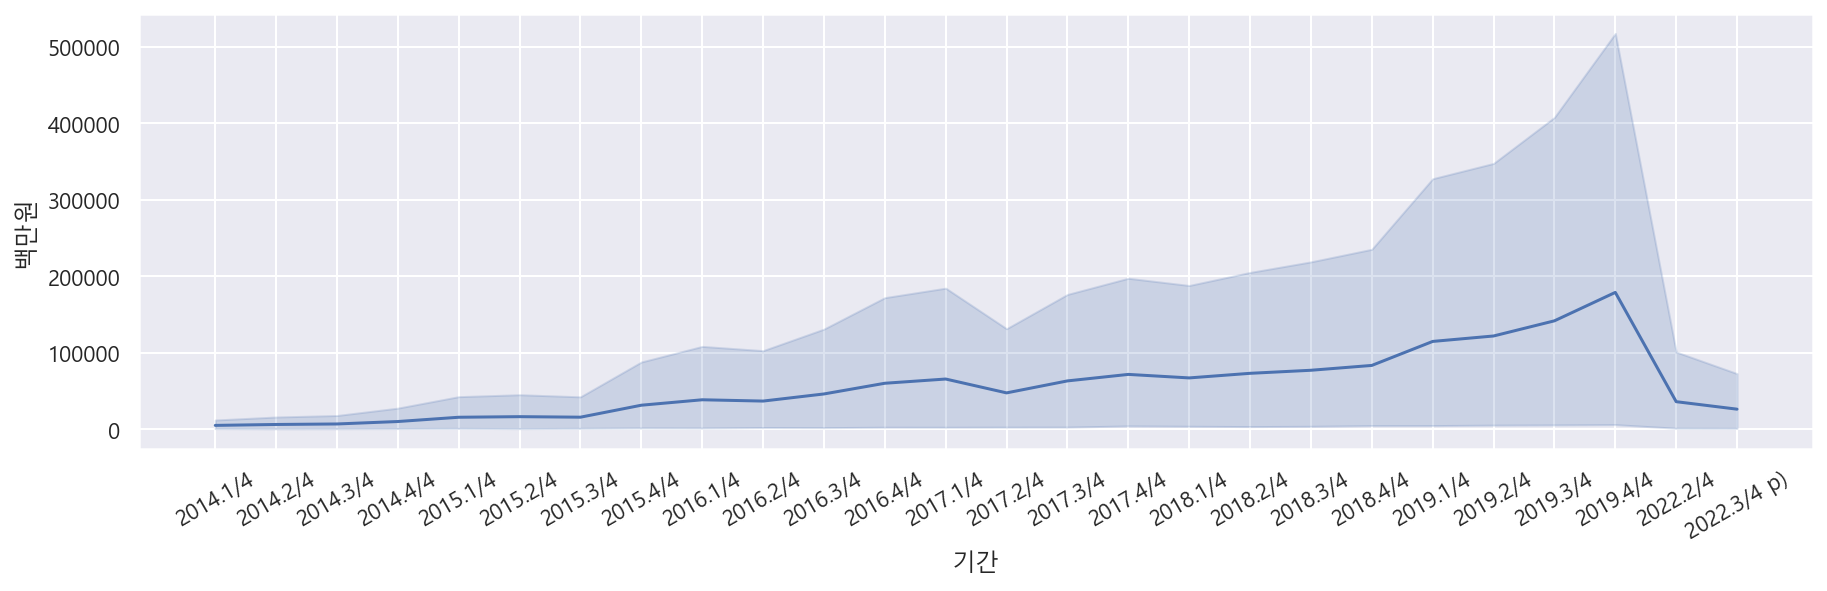

In [91]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화 하기
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="백만원")

<AxesSubplot:xlabel='기간', ylabel='백만원'>

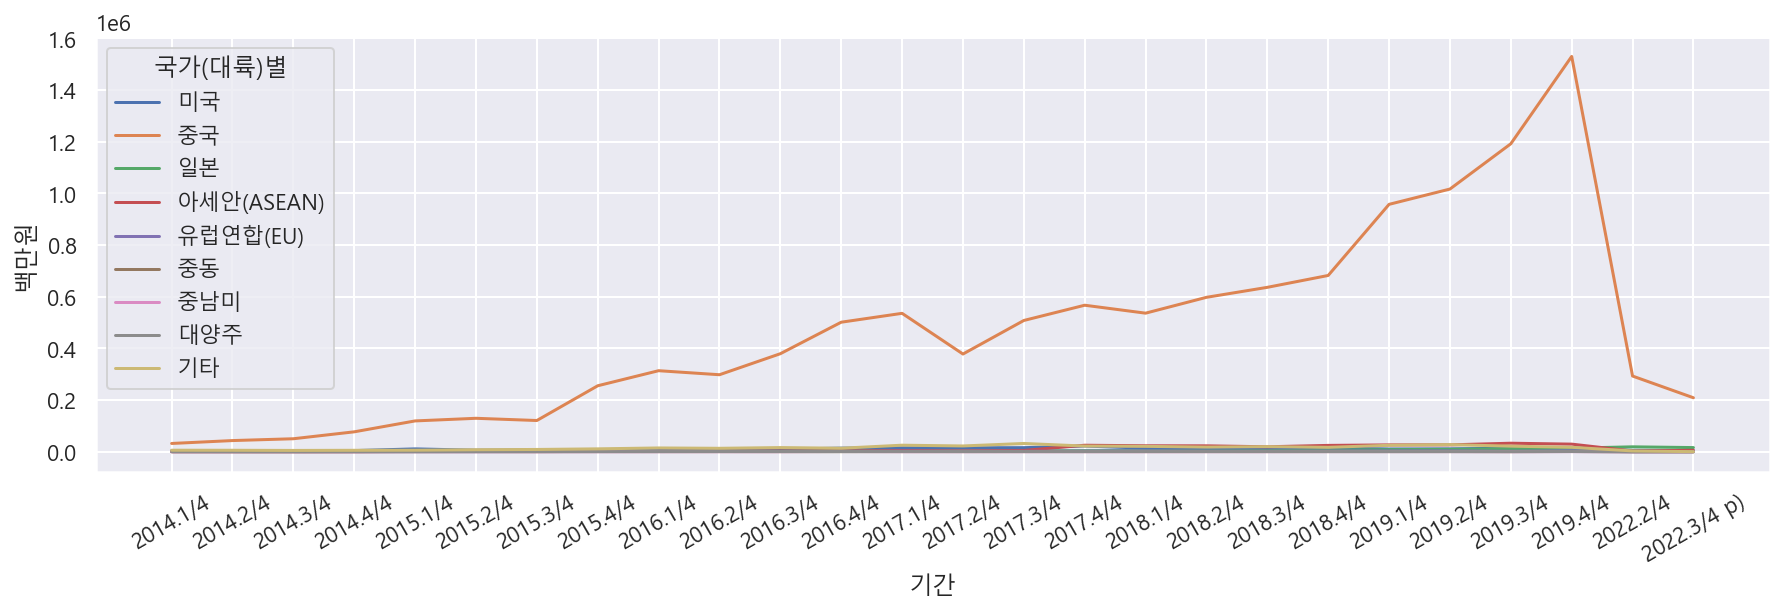

In [92]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하고, "국가(대륙)별"로 다른 색상으로 표시하기

plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="백만원", hue="국가(대륙)별")

# 중국 때문에 다른 국가의 정확한 값이 파악하기 힘듦
# 이때 
# sns.lineplot(data=df_cosmetic[df_cosmetic["국가(대륙)별"]!="중국"], x="기간", y="백만원", hue="국가(대륙)별")

# 위에 처럼 표현하기

<AxesSubplot:xlabel='기간', ylabel='백만원'>

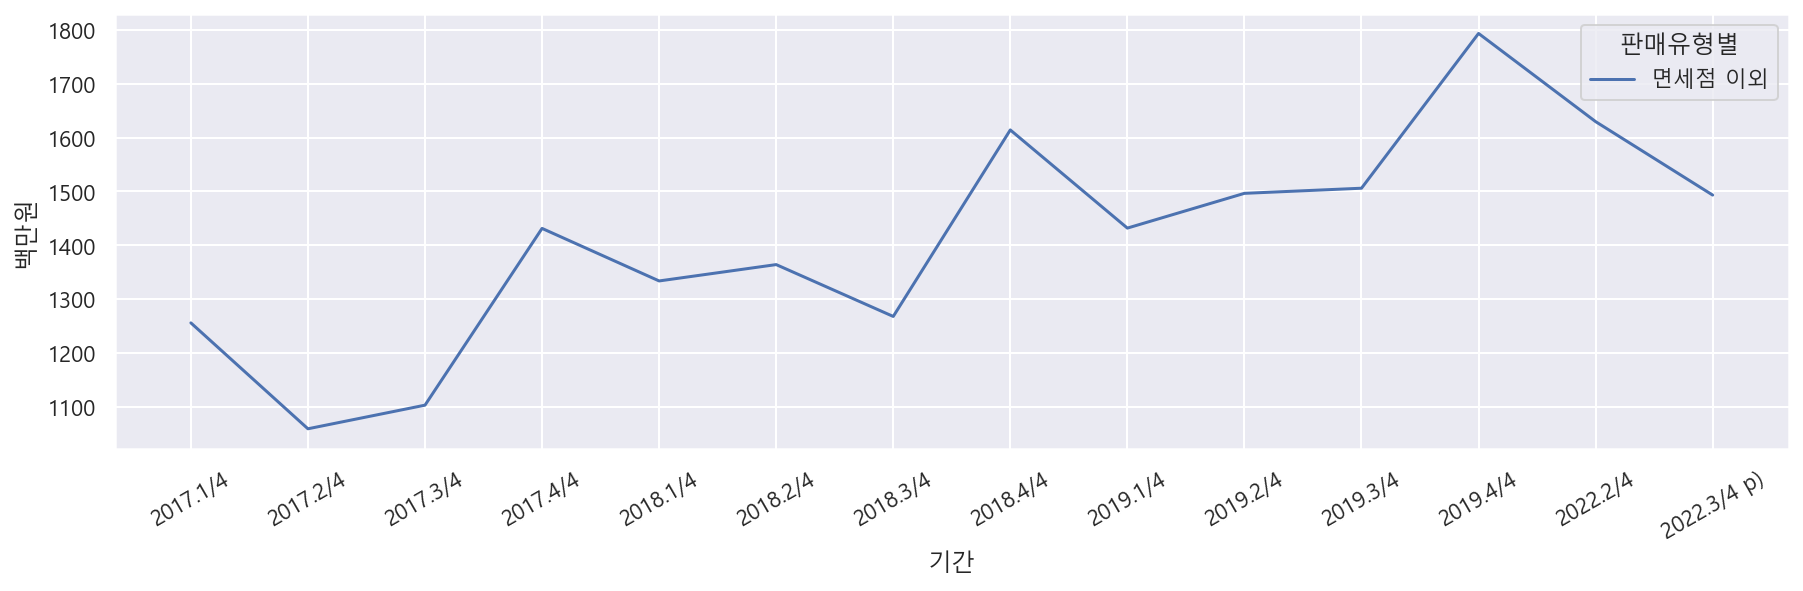

In [93]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하고 "판매유형별"로 다른 색상으로 표시하기

plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df[(df["판매유형별"] != "계") & (df["판매유형별"] != "면세점")], x="기간", y="백만원",hue="판매유형별", ci=None)

### 의류 및 패션관련 상품 온라인쇼핑 해외직접판매액

In [101]:
# df_fashion 이라는 변수에 의류 데이터만 가져와 따로 담아주기
df_fashion = df[(df["상품군별"] == "의류 및 패션 관련상품") & (df["판매유형별"]=="계")].copy()
df_fashion.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션 관련상품,계,2014.1/4,9810.0,2014,1
111,중국,의류 및 패션 관련상품,계,2014.1/4,12206.0,2014,1
156,일본,의류 및 패션 관련상품,계,2014.1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션 관련상품,계,2014.1/4,3473.0,2014,1
246,유럽연합(EU),의류 및 패션 관련상품,계,2014.1/4,1364.0,2014,1


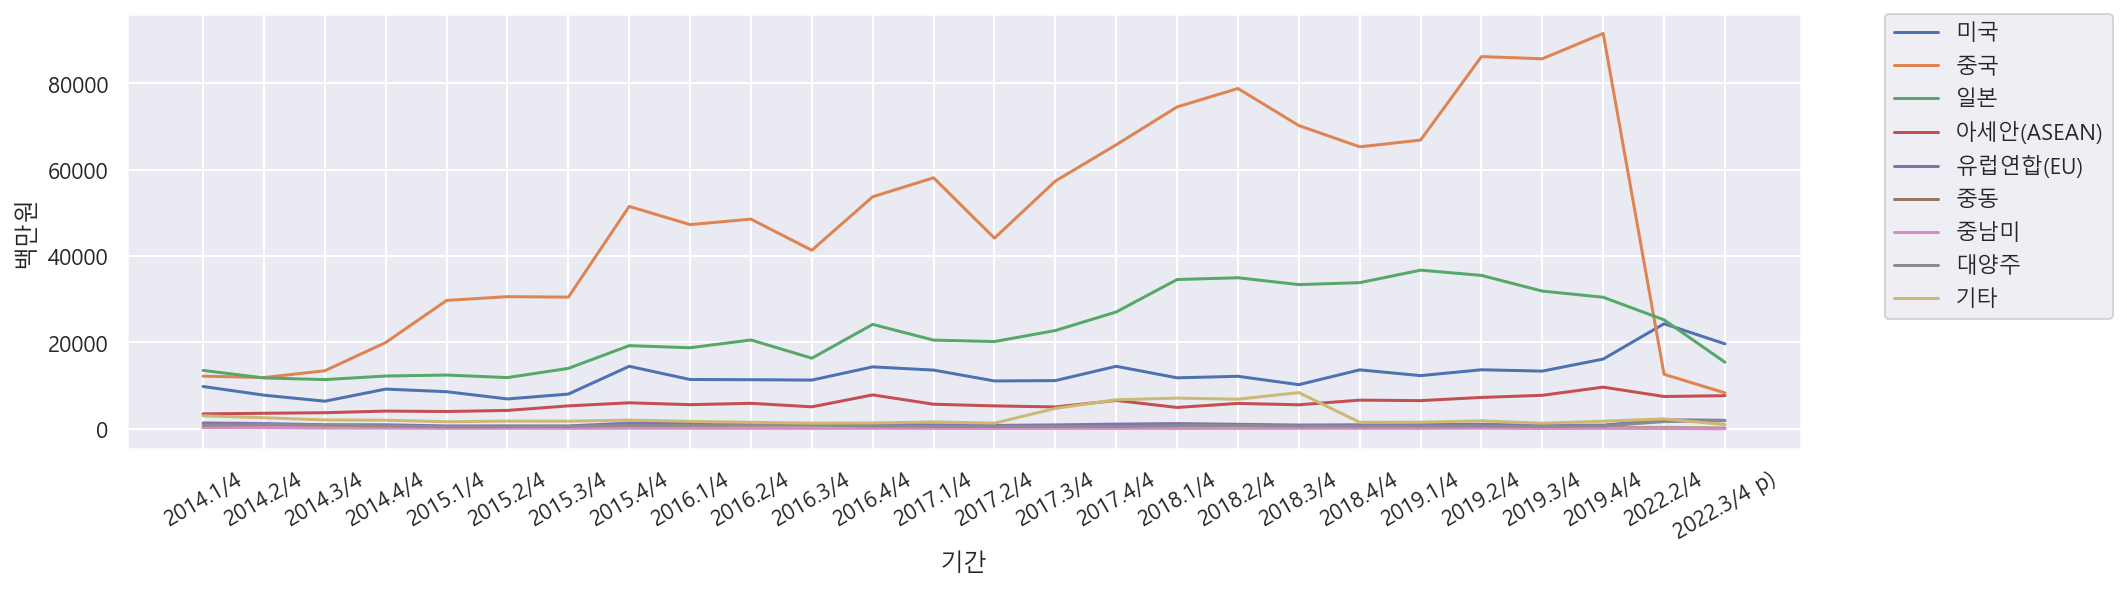

In [108]:
# "의류 및 패션 관련 상품" 판매액에 대한 기간별 금액 데이터 시각화하고
# " 국가(대륙)별"로 다른 색상으로 표시하기

plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x="기간", y="백만원", hue="국가(대륙)별")
plt.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0)

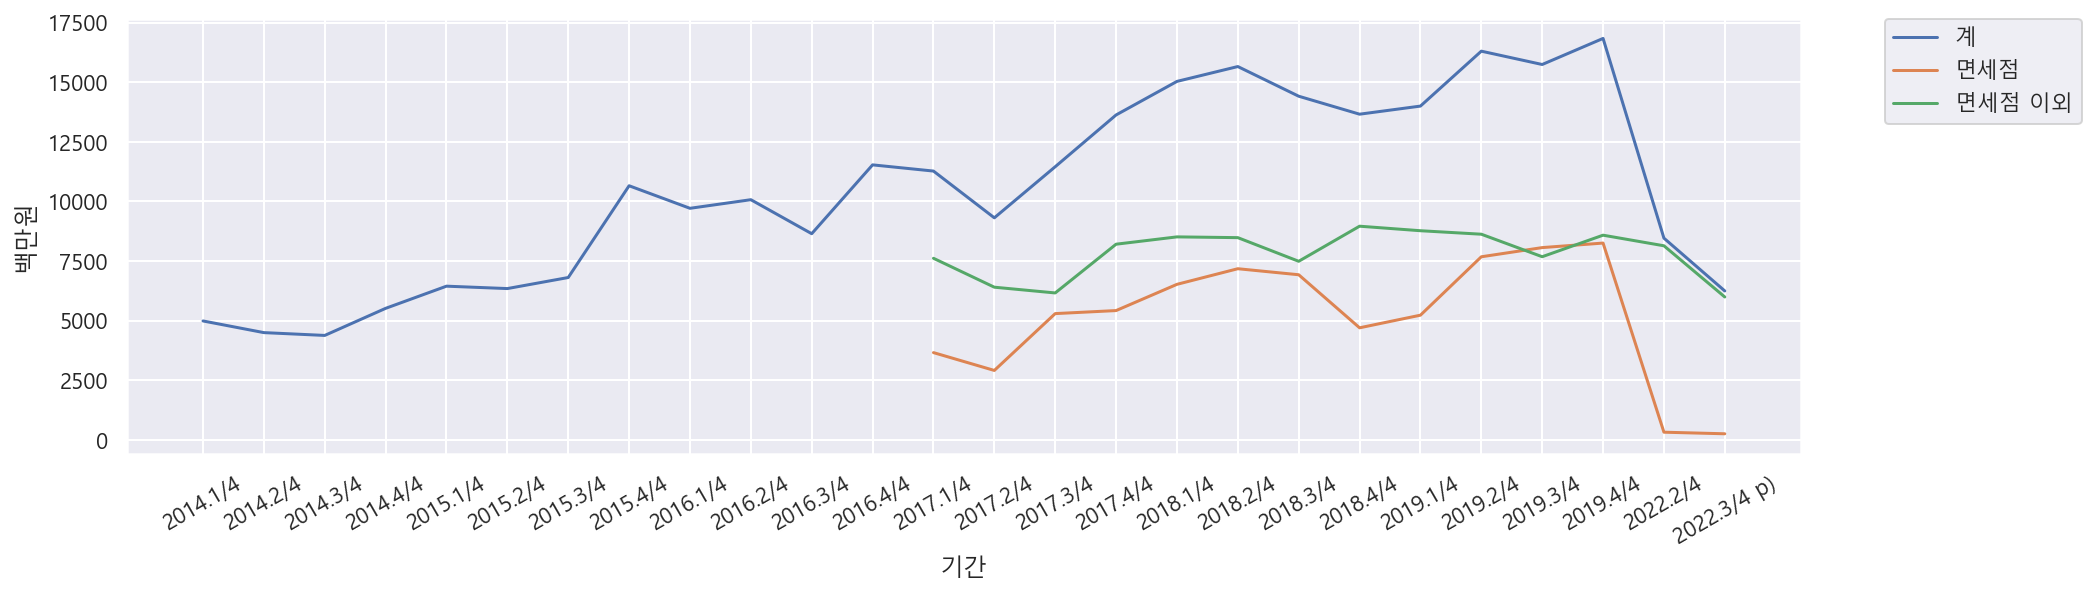

In [112]:
# "의류 및 패션관련 상품" 판매액에 대한 기간별 금액 데이터 시각화하고
# "판매유형별"로 다른 색상으로 표시하기


plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df[df["상품군별"] == "의류 및 패션 관련상품"], x="기간", y="백만원", hue="판매유형별", ci=None)
plt.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0)


### 데이터 집계하기

In [119]:
df_fashion.head(2)

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션 관련상품,계,2014.1/4,9810.0,2014,1
111,중국,의류 및 패션 관련상품,계,2014.1/4,12206.0,2014,1


In [120]:
# 피봇테이블로 "국가(대륙)별", "연도"별 합계 금액을 표 형태로 구하기

result = df_fashion.pivot_table(index="국가(대륙)별", columns="연도", 
                       values="백만원", aggfunc="sum")
result

연도,2014,2015,2016,2017,2018,2019,2022
국가(대륙)별,,,,,,,
기타,9683.0,7248.0,5918.0,14387.0,23901.0,6475.0,3300.0
대양주,3392.0,2349.0,3401.0,2266.0,2725.0,2489.0,3558.0
미국,33223.0,38066.0,48451.0,50353.0,47875.0,55536.0,44013.0
아세안(ASEAN),14936.0,19639.0,24478.0,22671.0,23068.0,31247.0,15175.0
유럽연합(EU),4485.0,3374.0,4899.0,3736.0,4114.0,3694.0,4084.0
일본,48960.0,57594.0,79905.0,90584.0,136800.0,134637.0,40670.0
중국,57531.0,142339.0,190932.0,225407.0,288848.0,330267.0,20965.0
중남미,975.0,616.0,649.0,762.0,576.0,544.0,101.0
중동,1172.0,1018.0,968.0,772.0,879.0,951.0,437.0


### 연산결과를 시각적으로 보기

<AxesSubplot:xlabel='연도', ylabel='국가(대륙)별'>

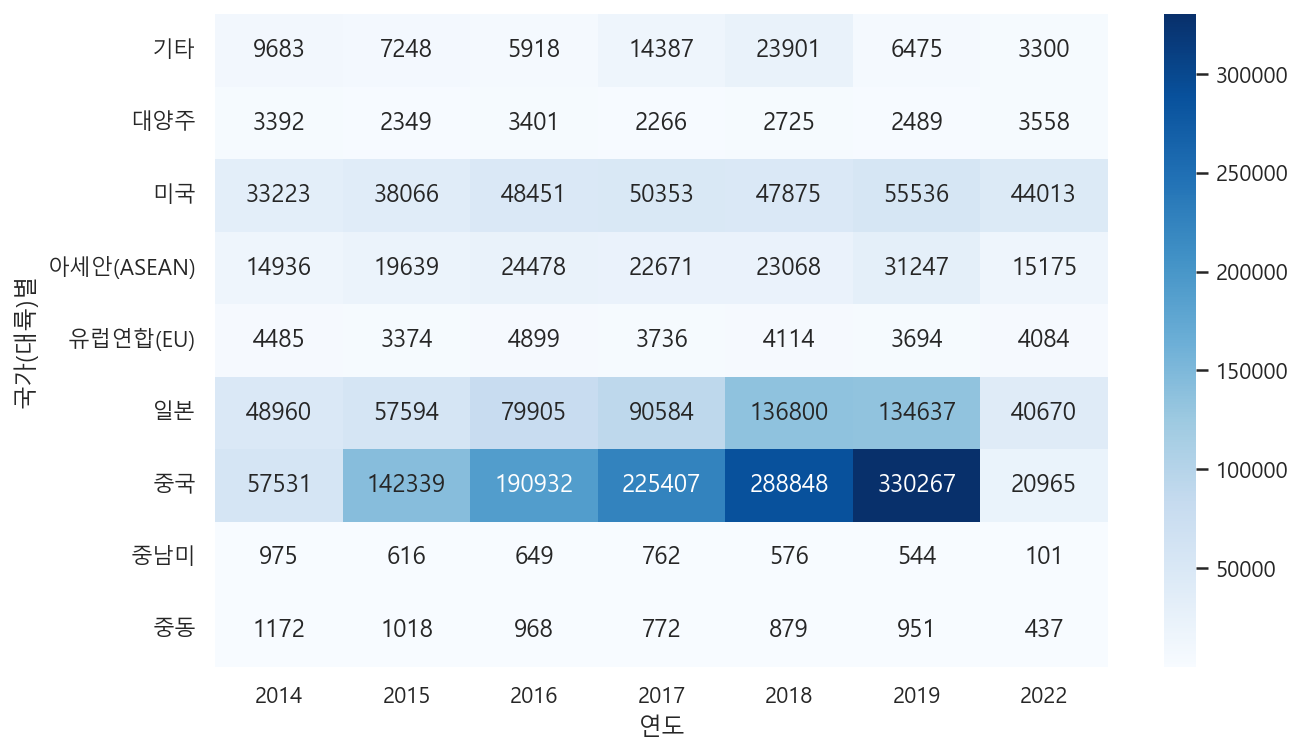

In [124]:
# 피봇테이블로 구한 결과를 값의 많고 적음에 따라 시각적으로 표현하기

plt.figure(figsize=(10,6))
sns.heatmap(result,cmap="Blues", annot=True, fmt=".0f")

## 전체 상품군별로 온라인쇼핑 해외직접판매액은 증가했을까?

<AxesSubplot:xlabel='연도', ylabel='백만원'>

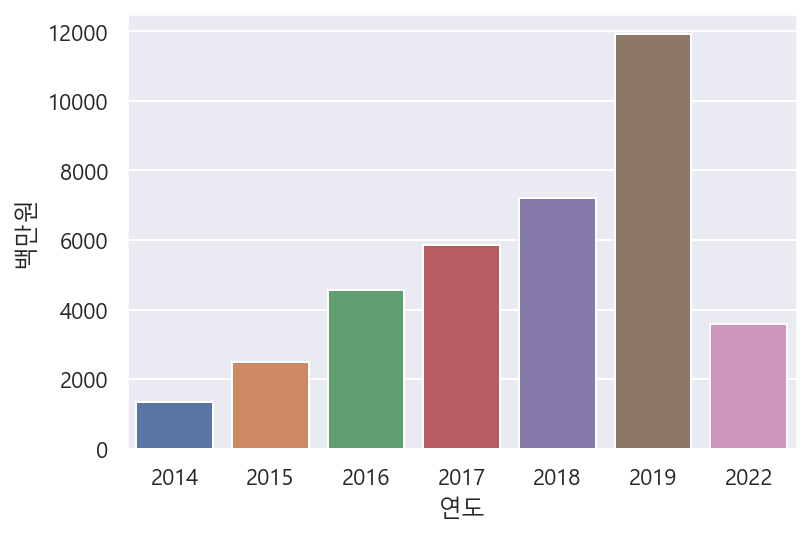

In [129]:
# 위에서 판매유형별 데이터의 "계"만 모은 df_total 변수를 통한 연도별 합계 금액을 시각화 하기

sns.barplot(data=df_total, x="연도", y="백만원", ci=None )

<AxesSubplot:xlabel='연도', ylabel='백만원'>

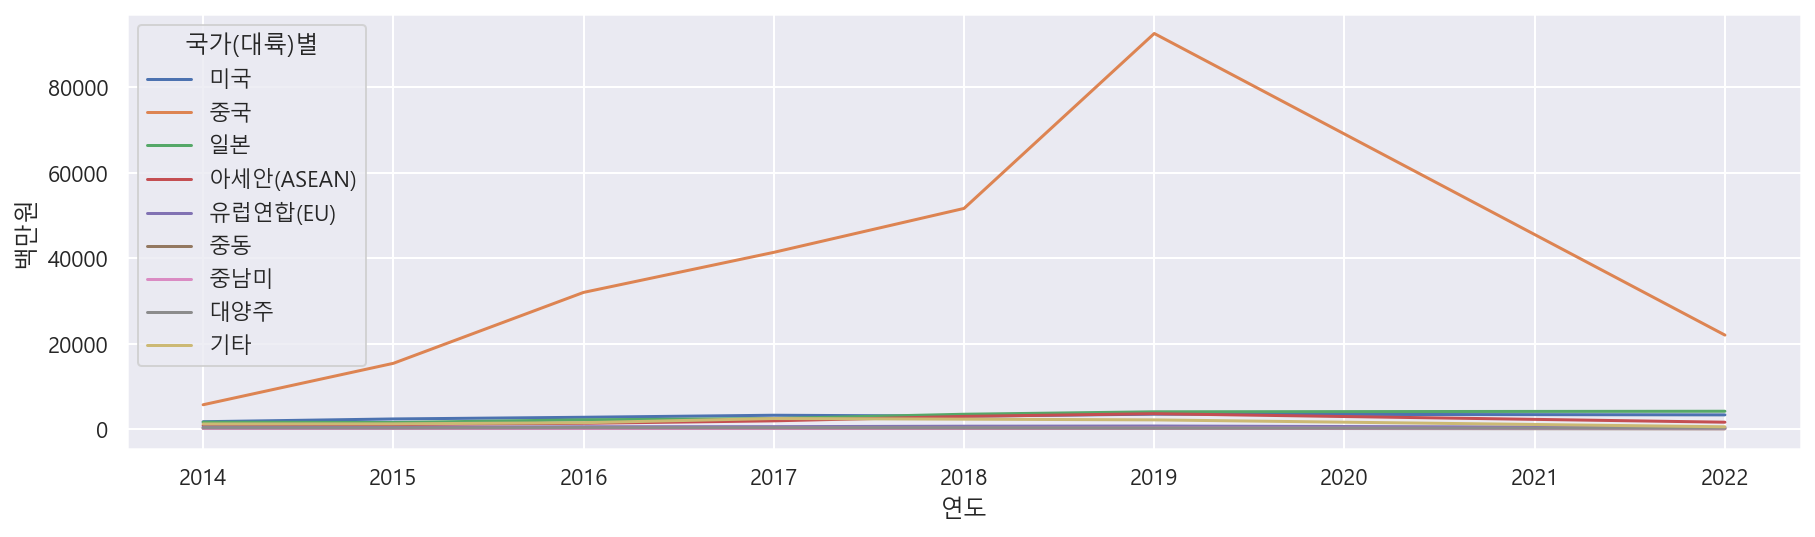

In [133]:
# 연도별 판매액을 그리고 "국가(대륙)별"로 다른 색상으로 표현하기

plt.figure(figsize=(15, 4))
sns.lineplot(data=df_total, x="연도", y="백만원", ci=None, hue="국가(대륙)별")

* lengend를 그래프의 밖에 그리기 : [matplotlib - Move legend outside figure in seaborn tsplot - Stack Overflow](https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot)

<Figure size 1080x288 with 0 Axes>

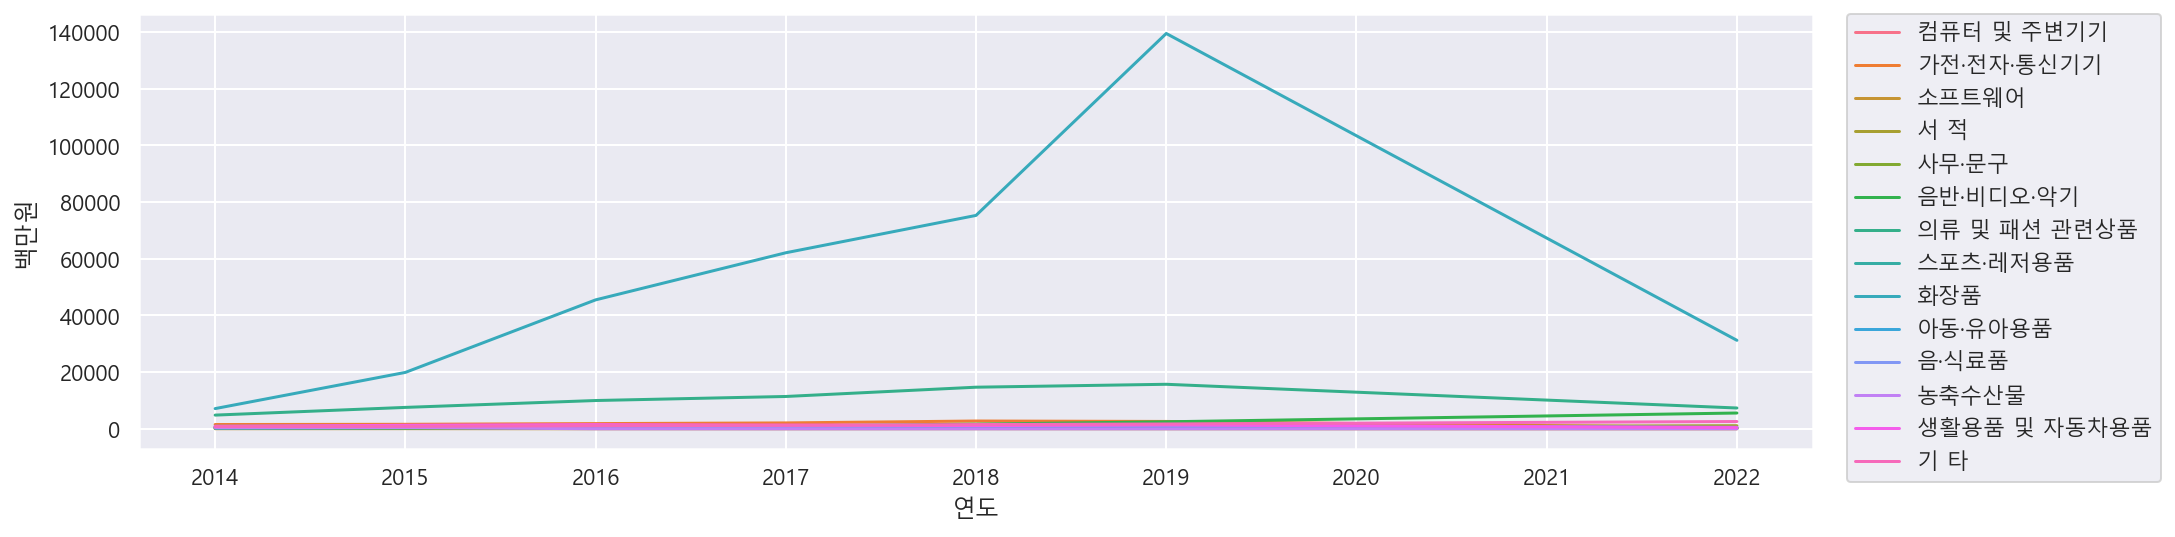

In [137]:
# 연도별 판매액을 그리고 "상품군별"로 다른 색상으로 표현하기


plt.figure(figsize=(15, 4))
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_total, x="연도", y="백만원", ci=None, hue="상품군별")
plt.legend(bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0.)

In [ ]:
# 코로나와 한중관게 악화로 면세점 전반적으로 중국 판매액이 줄었으며
# 중국이 총 매출액에 가장 많은 기여를 하고 있었으므로 총 판매액 또한 줄었다.
# 면세점 판매액은 완전히 급감하였고 면세점 외 판매액도 줄었으나 이전과 비슷한 수준이다.